# Proyek Klasifikasi Gambar: Fruits Classification 🍇(https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification)
- **Nama:** Adrian Putra Ramadhan
- **Email:** adrianramadhan881@gmail.com
- **ID Dicoding:** adrian_ramadhan

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.lite as tflite

## Data Preparation

In [2]:
# prompt: extract archive (11).zip in colab session storage

import zipfile

# Replace 'archive (11).zip' with the actual file name if it's different
with zipfile.ZipFile('FruitsClassification.zip', 'r') as zip_ref:
    zip_ref.extractall('./')


### Data Loading

In [3]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images} gambar")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error membuka {img_path}: {e}")

        print("Resolusi unik:")
        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")
    print(f"\nTotal gambar: {total_images}")

In [4]:
# Misalnya, kita cek resolusi pada folder '/train'
DATASET_PATH = 'FruitsClassification'  # pastikan path sesuai dengan struktur Anda
print("Cek resolusi gambar pada folder 'train':")
print_images_resolution(os.path.join(DATASET_PATH + '/train'))

Cek resolusi gambar pada folder 'train':
Strawberry: 1940 gambar
Resolusi unik:
- (206, 244)
- (100, 92)
- (111, 110)
- (201, 251)
- (186, 271)
- (189, 267)
- (276, 183)
- (125, 139)
- (280, 180)
- (185, 171)
- (272, 185)
- (220, 147)
- (51, 100)
- (257, 196)
- (100, 69)
- (284, 177)
- (118, 117)
- (173, 291)
- (209, 241)
- (265, 163)
- (298, 169)
- (151, 159)
- (104, 84)
- (244, 207)
- (248, 204)
- (237, 213)
- (249, 187)
- (186, 149)
- (172, 83)
- (210, 186)
- (139, 144)
- (201, 250)
- (213, 215)
- (221, 228)
- (224, 224)
- (264, 171)
- (189, 266)
- (276, 182)
- (394, 128)
- (225, 225)
- (336, 150)
- (282, 179)
- (189, 149)
- (205, 112)
- (274, 184)
- (184, 147)
- (255, 198)
- (185, 273)
- (286, 176)
- (190, 208)
- (197, 256)
- (215, 152)
- (90, 130)
- (101, 139)
- (341, 148)
- (233, 197)
- (173, 155)
- (264, 175)
- (156, 322)
- (213, 237)
- (226, 167)
- (114, 96)
- (167, 117)
- (172, 293)
- (85, 145)
- (208, 243)
- (317, 159)
- (228, 221)
- (86, 128)
- (168, 188)
- (168, 300)
- (278

In [5]:
# Misalnya, kita cek resolusi pada folder '/valid'
DATASET_PATH = 'FruitsClassification'  # pastikan path sesuai dengan struktur Anda
print("Cek resolusi gambar pada folder 'valid':")
print_images_resolution(os.path.join(DATASET_PATH, 'valid'))

Cek resolusi gambar pada folder 'valid':
Strawberry: 40 gambar
Resolusi unik:
- (239, 168)
- (265, 190)
- (183, 276)
- (147, 106)
- (163, 310)
- (195, 259)
- (224, 225)
- (183, 275)
- (284, 178)
- (259, 194)
- (262, 193)
- (253, 199)
- (100, 100)
- (266, 190)
- (194, 259)
- (284, 177)
- (389, 129)
- (225, 225)
- (275, 183)
- (196, 137)
- (142, 355)
---------------
Grape: 40 gambar
Resolusi unik:
- (260, 194)
- (274, 184)
- (239, 168)
- (168, 300)
- (250, 202)
- (265, 190)
- (214, 236)
- (178, 283)
- (183, 276)
- (147, 106)
- (328, 154)
- (163, 310)
- (277, 182)
- (195, 259)
- (224, 225)
- (276, 183)
- (183, 275)
- (284, 178)
- (300, 168)
- (259, 194)
- (190, 265)
- (230, 219)
- (262, 193)
- (253, 199)
- (100, 100)
- (266, 190)
- (450, 112)
- (272, 185)
- (135, 115)
- (194, 259)
- (284, 177)
- (389, 129)
- (225, 225)
- (290, 174)
- (275, 183)
- (262, 192)
- (232, 218)
- (196, 137)
- (142, 355)
---------------
Banana: 40 gambar
Resolusi unik:
- (260, 194)
- (274, 184)
- (239, 168)
- (168

In [6]:
# Misalnya, kita cek resolusi pada folder '/test'
DATASET_PATH = 'FruitsClassification'  # pastikan path sesuai dengan struktur Anda
print("Cek resolusi gambar pada folder 'test':")
print_images_resolution(os.path.join(DATASET_PATH, 'test'))

Cek resolusi gambar pada folder 'test':
Strawberry: 20 gambar
Resolusi unik:
- (284, 177)
- (201, 251)
- (225, 225)
- (101, 142)
- (100, 100)
- (275, 183)
- (291, 173)
- (276, 183)
- (183, 275)
- (300, 168)
- (287, 175)
- (259, 194)
---------------
Grape: 20 gambar
Resolusi unik:
- (260, 194)
- (274, 184)
- (265, 190)
- (285, 177)
- (201, 251)
- (200, 200)
- (101, 142)
- (276, 183)
- (214, 235)
- (183, 275)
- (300, 168)
- (259, 194)
- (100, 100)
- (271, 186)
- (284, 177)
- (340, 148)
- (225, 225)
- (275, 183)
- (291, 173)
- (267, 188)
- (287, 175)
---------------
Banana: 20 gambar
Resolusi unik:
- (260, 194)
- (207, 243)
- (274, 184)
- (265, 190)
- (308, 164)
- (297, 170)
- (285, 177)
- (163, 310)
- (305, 165)
- (201, 251)
- (200, 200)
- (101, 142)
- (276, 183)
- (214, 235)
- (183, 275)
- (300, 168)
- (138, 121)
- (259, 194)
- (344, 146)
- (91, 210)
- (100, 100)
- (271, 186)
- (210, 124)
- (284, 177)
- (340, 148)
- (225, 225)
- (262, 192)
- (275, 183)
- (291, 173)
- (157, 322)
- (267, 

In [7]:
# total data yang akan digunakan
total_train = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/train')])
total_val = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/valid')])
total_test = sum([len(files) for r, d, files in os.walk(DATASET_PATH + '/test')])
print(f"Total data latih: {total_train} gambar")
print(f"Total data validasi: {total_val} gambar")
print(f"Total data test: {total_test} gambar")
print(f"Total data keseluruhan: {total_train + total_val + total_test} gambar")

Total data latih: 9700 gambar
Total data validasi: 200 gambar
Total data test: 100 gambar
Total data keseluruhan: 10000 gambar


### Data Preprocessing

#### Split Dataset

In [8]:
# Karena struktur dataset sudah terbagi menjadi train, valid, dan test, kita buat generator masing-masing
# Tentukan target size agar resolusi gambar seragam
TARGET_SIZE = (150, 150)
BATCH_SIZE = 32

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 9700 images belonging to 5 classes.


In [11]:
# Data generator untuk validasi
valid_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = valid_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'valid'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 200 images belonging to 5 classes.


In [12]:
# Data generator untuk testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 100 images belonging to 5 classes.


## Modelling

In [13]:
# Membangun Model CNN Dasar dengan Sequential
model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Block 4
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,604,165 (13.75 MB)

 Trainable params: 3,602,693 (13.74 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [14]:
# Callback Implementation
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model_revised.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [15]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3906 - loss: 1.9279
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 79s 227ms/step - accuracy: 0.3908 - loss: 1.9272 - val_accuracy: 0.2000 - val_loss: 3.8383
Epoch 2/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5032 - loss: 1.4072
Epoch 2: val_accuracy improved from 0.20000 to 0.52000, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.5032 - loss: 1.4070 - val_accuracy: 0.5200 - val_loss: 1.2337
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5326 - loss: 1.2540
Epoch 3: val_accuracy improved from 0.52000 to 0.62000, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.5326 - loss: 1.2540 - val_accuracy: 0.6200 - val_loss: 1.0651
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5561 - loss: 1.1952
Epoch 4: val_accuracy improved from 0.62000 to 0.65500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.5561 - loss: 1.1951 - val_accuracy: 0.6550 - val_loss: 0.9708
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5950 - loss: 1.1056
Epoch 5: val_accuracy did not improve from 0.65500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.5950 - loss: 1.1056 - val_accuracy: 0.6400 - val_loss: 1.0064
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5902 - loss: 1.0963
Epoch 6: val_accuracy did not improve from 0.65500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.5902 - loss: 1.0962 - val_accuracy: 0.6500 - val_loss: 0.9473
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6172 - loss: 1.0547
Epoch 7: val_accuracy improved from 0.65500 to 0.66500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.6172 - loss: 1.0547 - val_accuracy: 0.6650 - val_loss: 0.8480
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6257 - loss: 0.9879
Epoch 8: val_accuracy did not improve from 0.66500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - accuracy: 0.6257 - loss: 0.9879 - val_accuracy: 0.6650 - val_loss: 0.8956
Epoch 9/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6411 - loss: 0.9735
Epoch 9: val_accuracy improved from 0.66500 to 0.70500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.6411 - loss: 0.9735 - val_accuracy: 0.7050 - val_loss: 0.7827
Epoch 10/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6490 - loss: 0.9375
Epoch 10: val_accuracy did not improve from 0.70500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.6490 - loss: 0.9375 - val_accuracy: 0.6750 - val_loss: 0.8869
Epoch 11/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6491 - loss: 0.9378
Epoch 11: val_accuracy improved from 0.70500 to 0.72500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.6491 - loss: 0.9378 - val_accuracy: 0.7250 - val_loss: 0.7954
Epoch 12/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6688 - loss: 0.8902
Epoch 12: val_accuracy did not improve from 0.72500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.6688 - loss: 0.8902 - val_accuracy: 0.7150 - val_loss: 0.7816
Epoch 13/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6761 - loss: 0.8763
Epoch 13: val_accuracy did not improve from 0.72500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.6761 - loss: 0.8763 - val_accuracy: 0.6600 - val_loss: 0.8132
Epoch 14/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6692 - loss: 0.8722
Epoch 14: val_accuracy did not improve from 0.72500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.6692 - loss: 0.8722 - val_accuracy: 0.6850 - val_loss: 0.9077
Epoch 15/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6733 - loss: 0.8552
Epoc

304/304 ━━━━━━━━━━━━━━━━━━━━ 84s 193ms/step - accuracy: 0.6897 - loss: 0.8173 - val_accuracy: 0.7350 - val_loss: 0.7521
Epoch 18/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6923 - loss: 0.8014
Epoch 18: val_accuracy did not improve from 0.73500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.6923 - loss: 0.8013 - val_accuracy: 0.7250 - val_loss: 0.7607
Epoch 19/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7062 - loss: 0.7861
Epoch 19: val_accuracy improved from 0.73500 to 0.74500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.7062 - loss: 0.7861 - val_accuracy: 0.7450 - val_loss: 0.6913
Epoch 20/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.7166 - loss: 0.7644
Epoch 20: val_accuracy did not improve from 0.74500
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.7166 - loss: 0.7644 - val_accuracy: 0.7200 - val_loss: 0.7326
Epoch 21/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.7187 - loss: 0.7552
Epoch 21: val_accuracy did not improve from 0.74500
304/304 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.7187 - loss: 0.7552 - val_accuracy: 0.7150 - val_loss: 0.7763
Epoch 22/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7166 - loss: 0.7418
Epoch 22: val_accuracy did not improve from 0.74500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7166 - loss: 0.7418 - val_accuracy: 0.7250 - val_loss: 0.7500
Epoch 23/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7266 - loss: 0.7292
Epoc

304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.7266 - loss: 0.7292 - val_accuracy: 0.7500 - val_loss: 0.7367
Epoch 24/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7356 - loss: 0.7158
Epoch 24: val_accuracy did not improve from 0.75000
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.7356 - loss: 0.7158 - val_accuracy: 0.7450 - val_loss: 0.7106
Epoch 25/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7368 - loss: 0.7018
Epoch 25: val_accuracy did not improve from 0.75000
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7368 - loss: 0.7018 - val_accuracy: 0.7400 - val_loss: 0.6955
Epoch 26/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7364 - loss: 0.7038
Epoch 26: val_accuracy improved from 0.75000 to 0.75500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 186ms/step - accuracy: 0.7364 - loss: 0.7038 - val_accuracy: 0.7550 - val_loss: 0.7284
Epoch 27/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7485 - loss: 0.6800
Epoch 27: val_accuracy did not improve from 0.75500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7485 - loss: 0.6800 - val_accuracy: 0.7550 - val_loss: 0.6017
Epoch 28/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7474 - loss: 0.6770
Epoch 28: val_accuracy did not improve from 0.75500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.7474 - loss: 0.6770 - val_accuracy: 0.7300 - val_loss: 0.6929
Epoch 29/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7599 - loss: 0.6716
Epoch 29: val_accuracy did not improve from 0.75500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.7599 - loss: 0.6716 - val_accuracy: 0.7400 - val_loss: 0.6457
Epoch 30/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7590 - loss: 0.6524
Epoc

304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.7640 - loss: 0.6394 - val_accuracy: 0.7750 - val_loss: 0.6813
Epoch 32/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7734 - loss: 0.6427
Epoch 32: val_accuracy did not improve from 0.77500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7734 - loss: 0.6427 - val_accuracy: 0.7700 - val_loss: 0.5946
Epoch 33/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7690 - loss: 0.6192
Epoch 33: val_accuracy did not improve from 0.77500
304/304 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.7690 - loss: 0.6192 - val_accuracy: 0.7450 - val_loss: 0.7019
Epoch 34/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7599 - loss: 0.6487
Epoch 34: val_accuracy did not improve from 0.77500
304/304 ━━━━━━━━━━━━━━━━━━━━ 83s 193ms/step - accuracy: 0.7599 - loss: 0.6487 - val_accuracy: 0.7750 - val_loss: 0.6047
Epoch 35/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7743 - loss: 0.6057
Epoc

304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.7743 - loss: 0.6057 - val_accuracy: 0.8100 - val_loss: 0.5612
Epoch 36/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7725 - loss: 0.6105
Epoch 36: val_accuracy improved from 0.81000 to 0.81500, saving model to best_model_revised.h5


304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.7725 - loss: 0.6104 - val_accuracy: 0.8150 - val_loss: 0.5745
Epoch 37/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7754 - loss: 0.6023
Epoch 37: val_accuracy did not improve from 0.81500
304/304 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.7755 - loss: 0.6023 - val_accuracy: 0.7650 - val_loss: 0.6577
Epoch 38/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.7912 - loss: 0.5795
Epoch 38: val_accuracy did not improve from 0.81500
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 193ms/step - accuracy: 0.7912 - loss: 0.5796 - val_accuracy: 0.7750 - val_loss: 0.6512
Epoch 39/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7934 - loss: 0.5733
Epoch 39: val_accuracy did not improve from 0.81500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.7934 - loss: 0.5733 - val_accuracy: 0.8150 - val_loss: 0.5660
Epoch 40/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7846 - loss: 0.5837
Epoc

304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.8194 - loss: 0.5061 - val_accuracy: 0.8550 - val_loss: 0.4227
Epoch 51/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8100 - loss: 0.5212
Epoch 51: val_accuracy did not improve from 0.85500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 189ms/step - accuracy: 0.8100 - loss: 0.5212 - val_accuracy: 0.7900 - val_loss: 0.6082
Epoch 52/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8165 - loss: 0.4938
Epoch 52: val_accuracy did not improve from 0.85500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.8165 - loss: 0.4938 - val_accuracy: 0.8150 - val_loss: 0.4754
Epoch 53/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8273 - loss: 0.4821
Epoch 53: val_accuracy did not improve from 0.85500
304/304 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.8273 - loss: 0.4821 - val_accuracy: 0.8150 - val_loss: 0.4984
Epoch 54/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8203 - loss: 0.4892
Epoc

## Evaluasi dan Visualisasi

In [16]:
# Evaluasi akurasi pada data training
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
print(f"Training accuracy: {train_acc*100:.2f}%")

# Evaluasi akurasi pada data testing
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%")


Training accuracy: 85.24%
Test accuracy: 85.00%


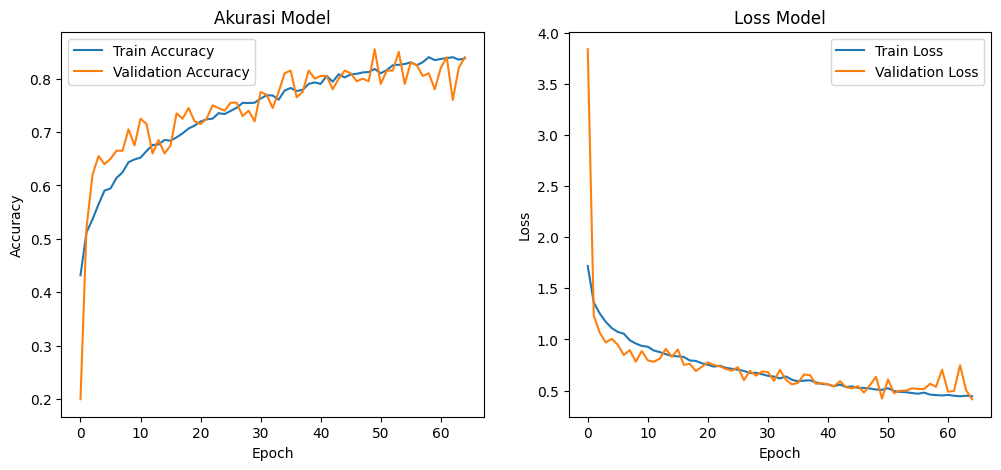

In [17]:
# Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Konversi Model

In [18]:
# Simpan sebagai SavedModel
# ------------------------------
saved_model_dir = './saved_model/my_model'
tf.saved_model.save(model, saved_model_dir)

In [19]:
# Konversi ke TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.experimental_new_converter = True # Use the new MLIR-based converter
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

tflite_dir = './tflite'
if not os.path.exists(tflite_dir):
    os.makedirs(tflite_dir)

with open(os.path.join(tflite_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

# Simpan file label.txt (misalnya dari train_generator.class_indices)
label_path = os.path.join(tflite_dir, 'label.txt')
with open(label_path, 'w') as f:
    for label, index in train_generator.class_indices.items():
        f.write(f"{index}:{label}\n")

print("Model berhasil disimpan sebagai SavedModel dan TF-Lite.")

Model berhasil disimpan sebagai SavedModel dan TF-Lite.


In [20]:
# TFJS
!pip install tensorflowjs



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found e

In [21]:
# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras best_model_revised.h5 tfjs_model

2025-03-27 12:50:47.259385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743079847.294279   19371 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743079847.305265   19371 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743079847.331926   19371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743079847.331970   19371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743079847.331979   19371 computation_placer.cc:177] computation placer alr

## Inference (Optional)

In [25]:
def load_and_preprocess_image(image_path, target_size=TARGET_SIZE):
    img = Image.open(image_path).resize(target_size)
    img = np.array(img) / 255.0
    if img.ndim == 2:
        img = np.stack((img,)*3, axis=-1)
    elif img.shape[-1] == 4:
        img = img[..., :3]
    return np.expand_dims(img.astype(np.float32), axis=0)

interpreter = tflite.Interpreter(model_path=os.path.join(tflite_dir, 'model.tflite'))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Coba aktifkan experimental_new_converter jika diperlukan:
converter.experimental_new_converter = True
# Ensure support for both built-in and select TensorFlow ops
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
# Perform the conversion
tflite_model = converter.convert()
with open(os.path.join(tflite_dir, 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp6_4ntqt_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  134621270689168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270690128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270692816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270689744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270689360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270692048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270693008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270694160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270694544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134621270693392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13462127069435

In [27]:
# Uji inference pada sample image (ubah path sesuai kebutuhan)
sample_image_path = os.path.join(DATASET_PATH, 'test', 'Apple', 'Apple (27).jpeg')
input_data = load_and_preprocess_image(sample_image_path)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(predictions[0])
print(f"Prediksi kelas untuk sample image: {predicted_class}")

print("Mapping label kelas:")
print(train_generator.class_indices)

Prediksi kelas untuk sample image: 0
Mapping label kelas:
{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


In [28]:
# prompt: download entire folder and file in colab notebook

from google.colab import files
import shutil
import os

def download_folder_and_files(folder_path, download_name="downloaded_files.zip"):
  """Downloads the specified folder and its contents as a zip file.

  Args:
    folder_path: The path to the folder you want to download.
    download_name: The name of the zip file to create.
  """

  shutil.make_archive(download_name.split('.')[0], 'zip', folder_path)
  files.download(download_name.split('.')[0] + '.zip')

# Specify the folder you want to download
folder_to_download = "/content/tflite"  # Replace with your desired folder

# Download the folder
download_folder_and_files(folder_to_download, "tflite_model.zip")


# Download the SavedModel folder
download_folder_and_files("/content/saved_model", "saved_model.zip")

# Download the tfjs_model folder
download_folder_and_files("/content/tfjs_model", "tfjs_model.zip")


# Download the best_model_revised.h5 file
files.download("best_model_revised.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>